# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

In [1]:
# Imports!
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
!ls data

Austin_Animal_Center_Intakes-clean-year.csv
Austin_Animal_Center_Intakes_053122.csv
Austin_Animal_Center_Outcomes_053122.csv
BankChurners.csv
Datafiniti_Fast_Food.csv
OpenFoodFacts.csv
chipotle.tsv
ds_chars.csv
heart.csv
new_releases.json
plants.json
preferences.csv
states.csv


In [4]:
# We'll start with chipotle data
# Be sure to set `sep='\t' since it's a tsv, not csv
chipotle = pd.read_csv('data/chipotle.tsv',sep='\t')

In [14]:
# Check it out
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [15]:
# Those item prices are gross - let's write a lambda function to clean that column!
# Capture the column in a new variable, item_prices
item_prices = chipotle['item_price'].apply(lambda x: float(x.replace('$','')))

In [19]:
# Check it
item_prices

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [21]:
print(f"Mean: {item_prices.mean()}")
print("*"*25)
print(f"Median: {item_prices.median()}")
print("*"*25)
print(f"Mode: {item_prices.mode()}")

Mean: 7.464335785374297
*************************
Median: 8.75
*************************
Mode: 0    8.75
dtype: float64


**Discussion**: If somebody asked you "How expensive are items at chipotle?", how would you answer?

- 'Around $7-9'


## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [23]:
print(f"Min: {item_prices.min()}")
print(f"Max: {item_prices.max()}")
print(f"Range: {item_prices.max() - item_prices.min()}")

Min: 1.09
Max: 44.25
Range: 43.16


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [25]:
print(f"25th Percentile: {np.percentile(item_prices, 25)}")
print(f"75th Percentile: {np.percentile(item_prices, 75)}")
print(f"IQR: {np.percentile(item_prices, 75) - np.percentile(item_prices, 25)}")

25th Percentile: 3.39
75th Percentile: 9.25
IQR: 5.859999999999999


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$

In [26]:
print(f"Standard Deviation: {item_prices.std()}")

Standard Deviation: 4.245557197940302


In [27]:
np.std(item_prices)#, ddof=1)

4.245097896029731

In [28]:
item_prices.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0.5, 1.0, 'Counts, 14 Bins')

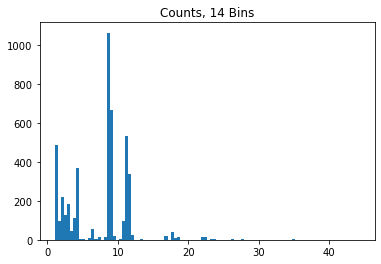

In [35]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=100)
plt.title('Counts, 14 Bins')

Text(0.5, 1.0, 'Counts, 10 Bins')

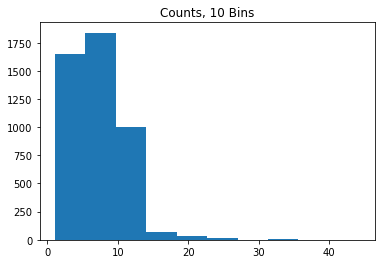

In [30]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=10)
plt.title('Counts, 10 Bins')

Text(0.5, 1.0, 'Counts, 5 Bins')

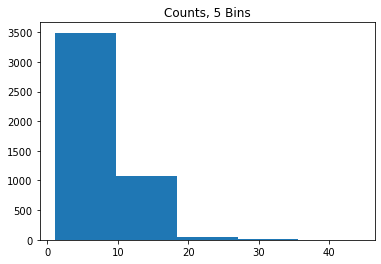

In [31]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 2 Bins')

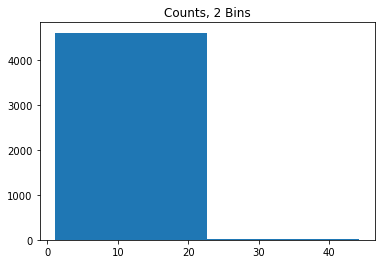

In [32]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=2)
plt.title('Counts, 2 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

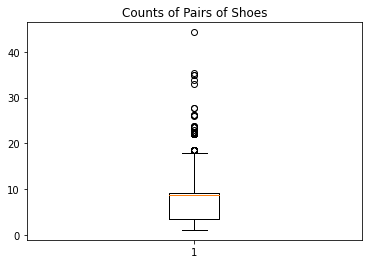

In [36]:
fig, ax = plt.subplots()
ax.boxplot(item_prices)
plt.title('Counts of Pairs of Shoes')

<AxesSubplot:xlabel='item_price'>

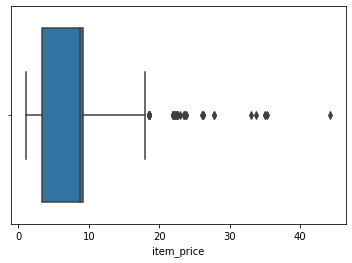

In [40]:
sns.boxplot(x=item_prices)

# Addressing Business Questions

## Fast Food Data

In [41]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

In [42]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [43]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Question 1

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [65]:
# Your code here
len(ffood['name'].unique())

569

In [64]:
ffood['name'] = ffood['name'].str.replace('-',' ')

In [56]:
ffood['name'] = ffood['name'].str.split('/')

In [59]:
ffood = ffood.explode(column='name')

<BarContainer object of 27 artists>

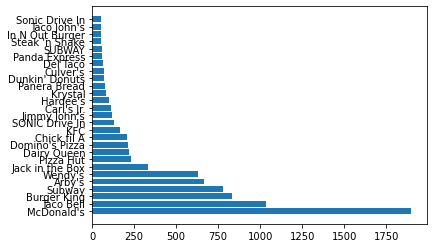

In [73]:
fit, ax = plt.subplots()

ax.barh(y=chain50.index, width=chain50.values)

### Question 2

Visualize the locations of restaurants in Buffalo, NY.

In [80]:
# Your code here
buffalo = ffood.loc[ffood['city'] == 'Buffalo']

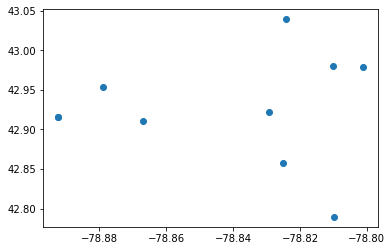

In [81]:
fig, ax = plt.subplots()

ax.scatter(x = buffalo['longitude'], y = buffalo['latitude'])

### Your Turn:

Work on questions 3-5 below in small groups:

### Question 3

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

In [84]:
# Your code here
alaska = ffood.loc[ffood['province'] == 'AK']

In [87]:
akTaco = alaska.loc[alaska['name'] == 'Taco Bell']

In [89]:
# akTaco
cityList = {'Cities':['Fairbanks','Anchorage'],'Count':2}
cityList

{'Cities': ['Fairbanks', 'Anchorage'], 'Count': 2}

### Question 4

Convert the ZIP Codes to (five-digit) integers.

In [101]:
# Your code here
ffood['postalCode'].apply(lambda x: x = int(x[:5]))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-101-6f28764fa69d>, line 2)

### Question 5

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers all the ZIP Codes between 94100 and 94188, inclusive)

In [ ]:
# Your code here

## Credit Card Data

In [102]:
credit = pd.read_csv('data/BankChurners.csv',
                     # Using a lambda function to ignore two unnecessary columns
                     usecols=lambda x: "Naive_Bayes" not in x)

In [103]:
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [104]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [105]:
credit['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

We work for a credit card company and are worried about customers churning (becoming attrited).

### Your Turn: Second Exercise!

In breakout rooms, work on questions 1-3 below:

### Question 1

Get the means of the numerical columns for the existing and the attrited customers separately.

In [ ]:
# Your code here

### Question 2

Visualize the distributions of total revolving balances for each group.

In [ ]:
# Your code here

### Question 3

Make two bar charts counting the numbers in each income category for each group separately.

In [ ]:
# Your code here